In [2]:
import pandas

#Import data from csv file
data = pandas.read_csv('heart_disease_health_indicators_BRFSS2015.csv')

In [3]:
#Show column  headers
print(data.columns.values)

print('Data shape: ', data.shape)

['HeartDiseaseorAttack' 'HighBP' 'HighChol' 'CholCheck' 'BMI' 'Smoker'
 'Stroke' 'Diabetes' 'PhysActivity' 'Fruits' 'Veggies' 'HvyAlcoholConsump'
 'AnyHealthcare' 'NoDocbcCost' 'GenHlth' 'MentHlth' 'PhysHlth' 'DiffWalk'
 'Sex' 'Age' 'Education' 'Income']
Data shape:  (253680, 22)


In [22]:
import numpy
#Import module to split train/test
from sklearn.model_selection import train_test_split

#truncate data (only to test - fit faster)
data = data.iloc[:10000, :]
print('data shape: ', data.shape)

#Split to data and labels, [whole column, from row 1 to the end]
X = data.iloc[:, 1:]
y = data.iloc[:, 0:1]

#Split into two parts
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=21, stratify=y)

data shape:  (10000, 22)


In [24]:
#import classifier - KMeans
from sklearn.neighbors import KNeighborsClassifier

#Create array of numbers
neighbors = numpy.arange(1, 13)

#Create empty dictionaries
test_accuracy = {}
train_accuracy = {}

#Loop through number of neighbours
for neighbor in neighbors:

    #Create model
    knn = KNeighborsClassifier(n_neighbors = neighbor)
    #fit model
    knn.fit(X_train, y_train)

    #Mesure accuracies and store in dictionaries
    test_accuracy[neighbor] = knn.score(X_test, y_test)
    train_accuracy[neighbor] = knn.score(X_train, y_train)

C:\Users\01sok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\01sok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\01sok\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\neighbors\_classification.py:233: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

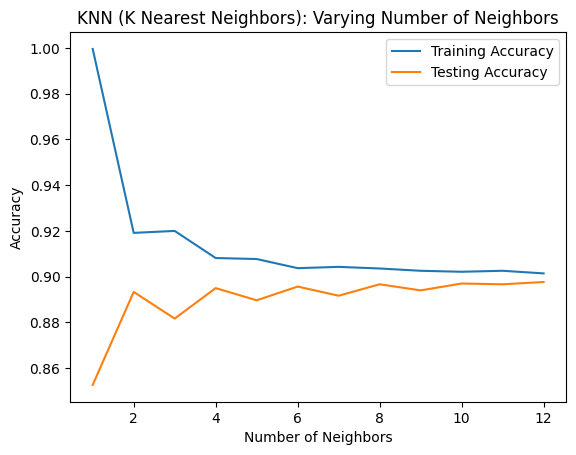

In [27]:
from matplotlib import pyplot as plt

#Show accuracies on a plot
plt.title('KNN (K Nearest Neighbors): Varying Number of Neighbors')
plt.plot(neighbors, train_accuracy.values(), label='Training Accuracy')
plt.plot(neighbors, test_accuracy.values(), label='Testing Accuracy')

plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()
#Maciej S.